In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from new_or_used import build_dataset

In [2]:
X_train, y_train, X_test, y_test = build_dataset()

In [3]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.Series(y_train)
y_test_df = pd.Series(y_test)

# EDA

# 1. Understanding data structure

In [4]:
# Dataset size
n = len(X_train+X_test)
print(f"Provided dataset has {len(X_train_df.columns)} variables and {n} items")
print(f"It was splitted into {len(X_train_df)/n*100:.1f}% training and {len(X_test_df)/n*100:.1f}% test items")

Provided dataset has 45 variables and 100000 items
It was splitted into 90.0% training and 10.0% test items


## 1.1 Features

In [5]:
X_train_df.columns

Index(['seller_address', 'warranty', 'sub_status', 'condition', 'deal_ids',
       'base_price', 'shipping', 'non_mercado_pago_payment_methods',
       'seller_id', 'variations', 'site_id', 'listing_type_id', 'price',
       'attributes', 'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

In [6]:
X_train_df.sample(5)  # Display a sample of the training data

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,...,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity
52532,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],135.00,"{'local_pick_up': True, 'methods': [], 'tags':...",[],6628350050,[],MLA,bronze,135.00,[],buy_it_now,...,http://mla-s1-p.mlstatic.com/21494-MLA43952787...,Mua - Sombra 8 ( Turqueza Verdoso Verde ),False,2015-08-26T02:10:46.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1445739046000,active,None,NaN,None,1,1440555046000,http://articulo.mercadolibre.com.ar/MLA4395278...,0,1
57008,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],70.00,"{'local_pick_up': True, 'methods': [], 'tags':...",[],6525612246,[],MLA,free,70.00,[],buy_it_now,...,http://mla-s2-p.mlstatic.com/182101-MLA3619696...,"Ensayos Profanos . Axel Gasquet , Martín Cucco...",False,2015-10-09T14:36:52.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449585412000,active,None,NaN,None,1,1444401412000,http://articulo.mercadolibre.com.ar/MLA3619696...,0,1
12039,"{'country': {'name': 'Argentina', 'id': 'AR'},...",7 DIAS,[],new,[],249.99,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",7927470228,[],MLA,silver,249.99,[],buy_it_now,...,http://mla-s2-p.mlstatic.com/22663-MLA62052284...,Esmaltes De Hello Kitty! Pack X 24 P/ Spa De N...,False,2015-08-21T00:06:48.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445299608000,active,None,NaN,None,5,1440115608000,http://articulo.mercadolibre.com.ar/MLA6205228...,97,3
16722,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],2200.00,"{'local_pick_up': True, 'methods': [], 'tags':...",[],8689508838,[],MLA,gold_special,2200.00,[],buy_it_now,...,http://mla-s2-p.mlstatic.com/611501-MLA7609680...,Licor Grand Marnier Magnum 2 Litros - Origen F...,True,2015-09-01T14:32:49.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1446301968000,active,None,NaN,None,1,1441117968000,http://articulo.mercadolibre.com.ar/MLA7609680...,0,1
77682,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],4700.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",9176527055,[],MLA,bronze,4700.00,[],buy_it_now,...,http://mla-s1-p.mlstatic.com/860301-MLA1417253...,Carruaje Estilo Rococo De Porcelana Capodimonte,False,2015-09-14T18:00:32.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447437632000,active,None,NaN,None,1,1442253632000,http://articulo.mercadolibre.com.ar/MLA1417253...,0,1


In [7]:
# There are too many columns to display all at once, so we will show a subset
X_train_df[['buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail']].sample(5)

,buying_mode,tags,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail
83599,buy_it_now,[dragged_bids_and_visits],,MLA1395444012,[],MLA1227,[{'id': 'MLA8734792633-921916503'}],2015-09-16T12:38:18.000Z,none,"[{'size': '321x500', 'secure_url': 'https://a2...",MLA8734792633,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/863601-MLA8734792...
31274,buy_it_now,[],,None,[],MLA15197,[{'id': 'MLA6313941901-941261444'}],2015-10-09T20:36:14.000Z,none,"[{'size': '210x210', 'secure_url': 'https://a2...",MLA6313941901,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/807901-MLA6313941...
75635,buy_it_now,[],,None,[],MLA1227,[{'id': 'MLA6779615238-938872914'}],2015-10-06T19:45:18.000Z,none,"[{'size': '288x447', 'secure_url': 'https://a2...",MLA6779615238,NaN,None,True,NaN,ARS,http://mla-s2-p.mlstatic.com/466901-MLA6779615...
42449,buy_it_now,[dragged_bids_and_visits],,MLA2149466552,[],MLA373864,[{'id': 'MLA6558387258-943692744'}],2015-10-13T18:57:50.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA6558387258,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/511701-MLA6558387...
56223,buy_it_now,[dragged_bids_and_visits],,MLA6908411312,[],MLA44020,[{'id': 'MLA9753710090-896779959'}],2015-08-17T14:43:13.000Z,none,"[{'size': '342x500', 'secure_url': 'https://a2...",MLA9753710090,NaN,None,True,NaN,ARS,http://mla-s1-p.mlstatic.com/4072-MLA975371009...


Probably, `condition` feature should be deleted because it's the actual target. This hypotesis have to be checked first.

`international_delivery_mode` has a wrong 'none' value so it needs to be corrected.

In [8]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   seller_address                    90000 non-null  object 
 1   warranty                          35243 non-null  object 
 2   sub_status                        90000 non-null  object 
 3   condition                         90000 non-null  object 
 4   deal_ids                          90000 non-null  object 
 5   base_price                        90000 non-null  float64
 6   shipping                          90000 non-null  object 
 7   non_mercado_pago_payment_methods  90000 non-null  object 
 8   seller_id                         90000 non-null  int64  
 9   variations                        90000 non-null  object 
 10  site_id                           90000 non-null  object 
 11  listing_type_id                   90000 non-null  object 
 12  pric

Dataset is formed by:
- **IDs:** `id`,`parent_item_id`, `official_store_id`, `category_id`, `site_id`, `video_id`, `catalog_product_id`, `deal_ids`, `seller_id`, `descriptions`
- **Price-related variables:** `price`, `original_price`, `base_price`
- **Transaction-related variables:**  `currency_id`, `accepts_mercadopago`, `warranty`
- **Quantity-related variables:** `initial_quantity`, `sold_quantity`, `available_quantity`
- **Post-related variables:** `title`, `thumbnail`, `pictures`, `permalink`, `secure_thumbnail`, `status`, `sub_status`, `buying_mode`, `condition`, `automatic_relist`
- **Time-related variables:** `start_time`, `stop_time`, `date_created`, `last_updated`
- **Seller-related variables:** `seller_address`, `listing_type_id`
- **Tags:** `tags`, `variations`, `shipping`, `attributes`, `non_mercado_pago_payment_methods`

As common practice, ID variables will be ignored during feature selection. Also, time-related variables won't be used.

In [9]:
X_train_df['id'].describe()

count             90000
unique            90000
top       MLA4695330653
freq                  1
Name: id, dtype: object

In [10]:
X_train_df['parent_item_id'].describe()

count             69310
unique            69310
top       MLA6553902747
freq                  1
Name: parent_item_id, dtype: object

Probably, `parent_item_id` is pointing to item's `id`, because they follow the same code structure *'MLA' + identifier* (int, 10)

### Identifying Missing Values

For some variables, we have missing values.

**Some nulls:**
1. `parent_item_id` (23.0%)
1. `warranty` (60.8%)

**Almost empty:**
1. `video_id` (97.0%)
1. `official_store_id` (99.2%)
1. `original_price` (99.9%)
1. `catalog_product_id` (~100%)

**No data:**
1. `differential_pricing`
1. `subtitle`

At a first glance, it looks like many features are null but have some content '[]', so they'll not be displayed as null by `.info()`.

In [11]:
X_train_df['sub_status'].describe()

count     90000
unique        4
top          []
freq      89109
Name: sub_status, dtype: object

In [12]:
# Showing options for 'sub_status'
X_train_df['sub_status'].value_counts()

sub_status
[]             89109
[suspended]      871
[expired]         13
[deleted]          7
Name: count, dtype: int64

We can see that `sub_status` marks a few cases as suspended, expired, or deleted. These items should be removed from the dataset.

In [13]:
X_train_df['deal_ids'].describe()

count     90000
unique       31
top          []
freq      89783
Name: deal_ids, dtype: object

In [14]:
X_train_df['variations'].describe()

count     90000
unique     7375
top          []
freq      82626
Name: variations, dtype: object

In [15]:
X_train_df['attributes'].describe()

count     90000
unique     3118
top          []
freq      78850
Name: attributes, dtype: object

In [16]:
X_train_df['tags'].describe()

count                         90000
unique                            8
top       [dragged_bids_and_visits]
freq                          65315
Name: tags, dtype: object

In [17]:
# Flatten all tag lists and get unique tag values
unique_tags = set(tag for tags_list in X_train_df['tags'] for tag in tags_list)
print(unique_tags)

{'good_quality_thumbnail', 'free_relist', 'poor_quality_thumbnail', 'dragged_visits', 'dragged_bids_and_visits'}


It seems we only have 5 relevant values for 'tags'.

So, it's plausible to assume that the remaining 3 appearing values are related with an empty field (NaN).

It'll be explored later.

In [18]:
X_train_df['listing_source'].describe()

count     90000
unique        1
top            
freq      90000
Name: listing_source, dtype: object

In [19]:
X_train_df['coverage_areas'].describe()

count     90000
unique        1
top          []
freq      90000
Name: coverage_areas, dtype: object

It's been verified that most of these features has '[]' instead of 'NaN'. It has to be modified.

***Conflictive Features:*** coverage_areas, listing_source, tags, attributes, variations, deal_ids, sub_status

Both `listing_source` and `coverage_areas` are completely empty. The others have between 87% up to 99% nulls.

---

### Variables distribution

In [20]:
# Descriptive statistics for numeric features
X_train_df.describe(include=['number'])

,base_price,seller_id,price,official_store_id,original_price,stop_time,catalog_product_id,initial_quantity,start_time,sold_quantity,available_quantity
count,9.000000e+04,9.000000e+04,9.000000e+04,745.000000,130.000000,9.000000e+04,7.000000e+00,90000.000000,9.000000e+04,90000.000000,90000.000000
mean,5.781341e+04,5.487386e+09,5.781352e+04,5802.018792,1492.522308,1.447648e+12,2.895700e+06,34.957178,1.442383e+12,2.328044,34.700767
std,9.089555e+06,2.587140e+09,9.089555e+06,2657.056302,1954.905741,3.251040e+09,1.919771e+06,421.091981,2.122683e+09,33.839328,420.811703
min,8.400000e-01,1.000319e+09,8.400000e-01,1024.000000,120.000000,1.444823e+12,9.440400e+04,1.000000,1.369110e+12,0.000000,1.000000
25%,9.000000e+01,3.184875e+09,9.000000e+01,3590.000000,449.000000,1.446313e+12,1.925518e+06,1.000000,1.441144e+12,0.000000,1.000000
50%,2.500000e+02,5.512496e+09,2.500000e+02,6158.000000,850.000000,1.447643e+12,3.051112e+06,1.000000,1.442524e+12,0.000000,1.000000
75%,8.000000e+02,7.704930e+09,8.000000e+02,8216.000000,1500.000000,1.448930e+12,4.073615e+06,2.000000,1.443800e+12,0.000000,2.000000
max,2.222222e+09,9.999853e+09,2.222222e+09,9996.000000,12248.000000,1.730732e+12,5.126117e+06,9999.000000,1.444900e+12,6065.000000,9999.000000


In [21]:
# Descriptive statistics for bool features
X_train_df.describe(include=['bool'])

,accepts_mercadopago,automatic_relist
count,90000,90000
unique,2,2
top,True,False
freq,88018,85773


**Observations:**

* **Price Discrepancy & Outliers**: The `base_price` and `price` columns show extreme outliers and a heavily right-skewed distribution, where the majority of products are inexpensive, but a few are exceptionally high-priced.
* **Seller Diversity**: The dataset covers a wide range of sellers.
* **Lack of Official Store & Catalog Data**: Most products are not from official stores nor linked to specific catalog product IDs, indicating a diverse marketplace with many independent sellers and general listings.
* **Sparse Discount Information**: `original_price` is rarely recorded, suggesting that discounts aren't a primary feature in the majority of these listings.
* **Inventory & Sales Distribution**: While most listings have low initial and available quantities and sell few items, there are some high-volume listings that significantly impact the average `initial_quantity`, `sold_quantity`, and `available_quantity`. This suggests a "power law" distribution typical of sales data, where a small percentage of listings account for a large percentage of sales.

In [22]:
# Descriptive statistics for string features
# NOTE: Due to the large number of columns and rows, we will sample a subset of the data
X_train_df.sample(int(len(X_train_df)*0.2)).describe(include=['object']) # pd.describe() for 'objects' is a time consuming process

,seller_address,warranty,sub_status,condition,deal_ids,shipping,non_mercado_pago_payment_methods,variations,site_id,listing_type_id,attributes,buying_mode,tags,listing_source,parent_item_id,...,descriptions,last_updated,international_delivery_mode,pictures,id,differential_pricing,currency_id,thumbnail,title,date_created,secure_thumbnail,status,video_id,subtitle,permalink
count,18000,7010,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,18000,13870,...,18000,18000,18000,18000,18000,0,18000,18000,18000,18000,18000,18000,497,0,18000
unique,1712,2785,4,2,13,23,83,1482,1,7,654,3,7,1,13870,...,17536,17828,1,17840,18000,0,2,17835,17917,17467,17835,3,382,0,18000
top,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Sí,[],new,[],"{'local_pick_up': True, 'methods': [], 'tags':...",[],[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],,MLA3187719821,...,[],2015-09-04T22:10:47.000Z,none,[],MLA5318071280,NaN,ARS,,50 Suspensores Para Short De Baño Tela Calada,2015-09-28T14:10:39.000Z,,active,QQNfOicE_o8,NaN,http://articulo.mercadolibre.com.ar/MLA5318071...
freq,719,1060,17834,9635,17956,7477,5454,16519,18000,11393,15787,17485,13081,18000,1,...,465,3,18000,161,1,NaN,17891,161,11,4,161,17245,59,NaN,1


In [23]:
X_train_df['status'].unique()

array(['active', 'paused', 'closed', 'not_yet_active'], dtype=object)

In [24]:
X_train_df['seller_address'].sample().to_list()

[{'country': {'name': 'Argentina', 'id': 'AR'},
  'state': {'name': 'Buenos Aires', 'id': 'AR-B'},
  'city': {'name': 'Ituzaingó', 'id': 'TUxBQ0lUVTNjNDFm'}}]

In [25]:
X_train_df['status'].describe()

count      90000
unique         4
top       active
freq       86116
Name: status, dtype: object

### Unique values

In [26]:
def create_unique_value_lists(df: pd.DataFrame) -> dict:
    """
    Creates a dictionary of unique values for each column in a DataFrame,
    but only if the number of unique values in a column is less than 16.

    Args:
        df: The input pandas DataFrame.

    Returns:
        A dictionary where keys are column names and values are lists of
        unique values for those columns, subject to the condition.
    """
    unique_values_dict = {}
    for column in df.columns:
        # Check if the column contains dictionaries or other unhashable types
        # and convert them to strings for unique() to work.
        # This is a robust way to handle mixed types or potential unhashable objects.
        if df[column].apply(lambda x: isinstance(x, (dict, list, set))).any():
            unique_vals = df[column].astype(str).unique()
        else:
            unique_vals = df[column].unique()

        if len(unique_vals) < 16:
            unique_values_dict[column] = unique_vals.tolist()
    return unique_values_dict

In [27]:
X_train_df['listing_source'].unique()

array([''], dtype=object)

In [28]:
# Get unique values for each column with less than 16 unique values
filtered_unique_values = create_unique_value_lists(X_train_df)
filtered_unique_values = sorted(filtered_unique_values.items(), key=lambda x: len(x[1]), reverse=False)

print("Unique values (with less than 16 possibilities):")
for col, values in filtered_unique_values:
    print(f"Column '{col}': {values}")

Unique values (with less than 16 possibilities):
Column 'site_id': ['MLA']
Column 'listing_source': ['']
Column 'coverage_areas': ['[]']
Column 'international_delivery_mode': ['none']
Column 'differential_pricing': [None]
Column 'subtitle': [None]
Column 'condition': ['new', 'used']
Column 'accepts_mercadopago': [True, False]
Column 'currency_id': ['ARS', 'USD']
Column 'automatic_relist': [False, True]
Column 'buying_mode': ['buy_it_now', 'classified', 'auction']
Column 'sub_status': ['[]', "['suspended']", "['expired']", "['deleted']"]
Column 'status': ['active', 'paused', 'closed', 'not_yet_active']
Column 'listing_type_id': ['bronze', 'silver', 'free', 'gold_special', 'gold', 'gold_premium', 'gold_pro']
Column 'tags': ["['dragged_bids_and_visits']", '[]', "['good_quality_thumbnail', 'dragged_bids_and_visits']", "['good_quality_thumbnail']", "['dragged_visits']", "['dragged_visits', 'free_relist']", "['poor_quality_thumbnail', 'dragged_bids_and_visits']", "['poor_quality_thumbnail']"

In [29]:
X_train_df['tags'].value_counts()

tags
[dragged_bids_and_visits]                            65315
[]                                                   22412
[good_quality_thumbnail, dragged_bids_and_visits]     1191
[dragged_visits]                                       464
[good_quality_thumbnail]                               346
[dragged_visits, free_relist]                          259
[poor_quality_thumbnail, dragged_bids_and_visits]       10
[poor_quality_thumbnail]                                 3
Name: count, dtype: int64

**Observations:**
- It looks like `tags` work as a list of strings that specify every tag that applies to that item.
- It appears that `site_id` is always 'MLA'.
- Some are binary features: `condition`, `currency_id`, `automatic_relist`
- `catalog_product_id` is almost empty (just a few items with data).

For this dataset, `site_id` doesn't add any information because it's 'MLA' value for every item. Therefore, it won't be used.

In [30]:
X_train_df['site_id'].describe()

count     90000
unique        1
top         MLA
freq      90000
Name: site_id, dtype: object

### Outliers

### Correlation

In [31]:
# Get the numerical columns
numerical_features = X_train_df.select_dtypes(include=['number']).columns.tolist()

print("Numerical features for filtering:")
print(numerical_features)

Numerical features for filtering:
['base_price', 'seller_id', 'price', 'official_store_id', 'original_price', 'stop_time', 'catalog_product_id', 'initial_quantity', 'start_time', 'sold_quantity', 'available_quantity']


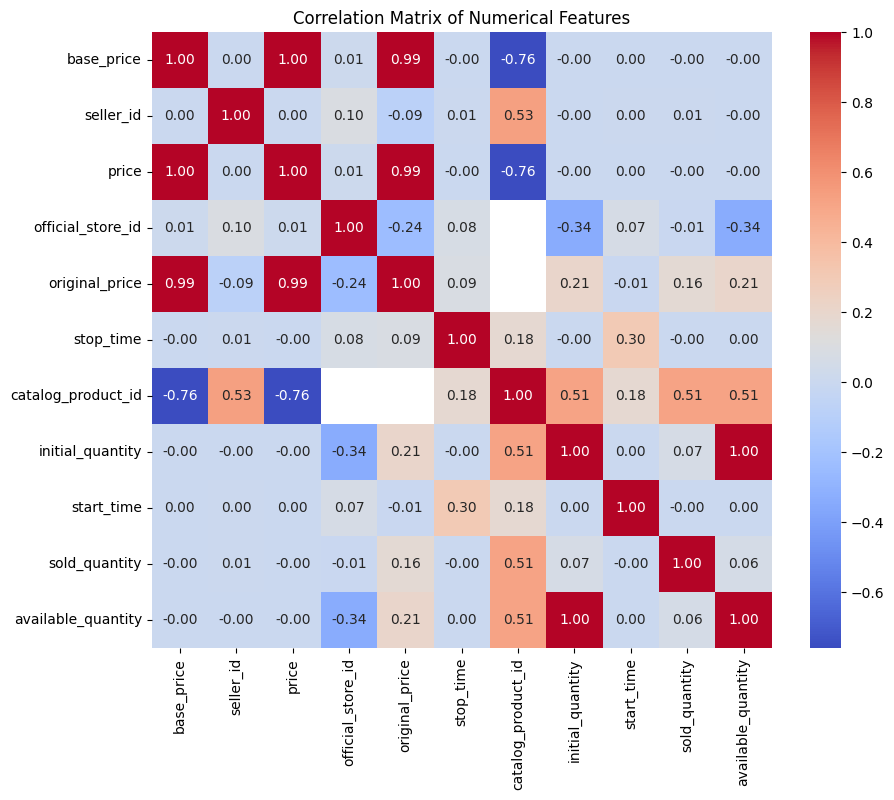

In [32]:
# Compute correlation matrix for numerical features
corr_matrix = X_train_df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Observations:**
- ***Linear correlation:***
    - best_price/price/original_price
    - initial_quantity/available_quantity
- ***Positive correlation:***
    1. catalog_product_id/seller_id
    1. catalog_product_id/initial_quantity/sold_quantity/available_quantity
    1. start_time/stop_time
    1. original_price/initial_quantity/available_quantity/sold_quantity
    1. start_time/catalog_product_id
- ***Negative correlation:***
    1. catalog_product_id/price/base_price
    1. official_store_id/initial_quantity/available_quantity
    1. official_store_id/original_price

**Insights:**
- High correlation between different price & quantity variables is expectable.
- Both `catalog_product_id` & `official_store_id` have a strong negative correlation with price & quantity variables. However, these features had a lot of null values, then they won't be useful for inference.



## 1.2 Target variable

In [5]:
# Target variable distribution
y_train_df.describe()

count     90000
unique        2
top         new
freq      48352
dtype: object

In [6]:
X_train_df['condition'].describe()

count     90000
unique        2
top         new
freq      48352
Name: condition, dtype: object

In [7]:
detected = False
for i, row in enumerate(X_train_df['condition']):
    if row == y_train_df.iloc[i]:
        pass
    else:
        print(f"Mismatch at index {i}:", row)
        detected = True
if not detected:
    print("No mismatches detected between 'condition' and target variable.")

No mismatches detected between 'condition' and target variable.


In [8]:
X_test_df.columns

Index(['seller_address', 'warranty', 'sub_status', 'deal_ids', 'base_price',
       'shipping', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

As we verified, the column `condition` is effectively the target value. We will remove it from dataset.

Actually, it should've been removed by the `new_or_used.py` script, but it seems that feature was forgotten for the test split.

The `build_dataset()` function should be fixed to delete it previously.

In [9]:
# Remove 'condition' column as it is the target variable
del X_train_df['condition']

In [10]:
X_train_df.columns

Index(['seller_address', 'warranty', 'sub_status', 'deal_ids', 'base_price',
       'shipping', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity'],
      dtype='object')

# 2. Feature Engineering

## Removing empty values

In [11]:
empty_columns = ['differential_pricing', 'subtitle', 'listing_source', 'coverage_areas','international_delivery_mode']
X_train_df[empty_columns].describe()

,differential_pricing,subtitle,listing_source,coverage_areas,international_delivery_mode
count,0,0,90000,90000,90000
unique,0,0,1,1,1
top,NaN,NaN,,[],none
freq,NaN,NaN,90000,90000,90000


In [12]:
# Remove empty columns
X_train_df.drop(columns=empty_columns, inplace=True)
y_train_df.drop(columns=empty_columns, inplace=True)

## Missing Values handling
- Nulls: `parent_item_id`, `warranty`
- empty list ('[]'): `sub_status`, `tags`

### Nulls
We have previously detected missing values for `parent_item_id` and `warranty`, but these features won't be taken in consideration, so handling missing values is no needed by now.

### Empty lists
Some features has '[]' values

In [13]:
# Convert the column to string type to ensure consistency
X_train_df['sub_status'] = X_train_df['sub_status'].astype(str)
X_train_df['sub_status'] = X_train_df['sub_status'].replace('[]', np.nan)

In [14]:
X_train_df['sub_status'].unique()

array([nan, "['suspended']", "['expired']", "['deleted']"], dtype=object)

In [15]:
# Remove items where 'sub_status' contains any data (not active items)
original = len(X_train_df)
mask = X_train_df['sub_status'].isna()
X_train_df = X_train_df[mask]
y_train_df = y_train_df[mask]
cleaned = len(X_train_df)
print(f"Removed {original - cleaned} items ({cleaned/original-1:.2%}) with 'sub_status' data.")

Removed 891 items (-0.99%) with 'sub_status' data.


In [16]:
# Double check if values were removed correctly
X_train_df['sub_status'].unique()

array([nan], dtype=object)

In [17]:
# 'sub_status' is no longer needed, so we can drop it
X_train_df.drop(columns=['sub_status'], inplace=True)

## Outliers handling

In [18]:
def remove_outliers_iqr(df: pd.DataFrame, column: str, iqr_factor: float = 1.5) -> pd.DataFrame:
    """
    Removes outliers from a specified column in a DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the numerical column to remove outliers from.
        iqr_factor (float): The multiplier for the IQR to define outlier bounds (default is 1.5).

    Returns:
        pd.DataFrame: A new DataFrame with outliers removed from the specified column.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR

    # Filter out the outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"Outliers removed from '{column}' using IQR method (factor: {iqr_factor}):")
    print(f"  Original rows: {len(df)}")
    print(f"  Rows after outlier removal: {len(df_no_outliers)}")
    print(f"  Outliers removed: {len(df) - len(df_no_outliers)}")

    return df_no_outliers

In [19]:
continuous_features = ['price', 'initial_quantity']

# Initialize the DataFrame that will store the cumulatively filtered data.
X_train_outlier_df = X_train_df.copy()

for feature in continuous_features:
    X_train_outlier_df = remove_outliers_iqr(X_train_outlier_df.copy(), feature, iqr_factor=1.5)
    print()

Outliers removed from 'price' using IQR method (factor: 1.5):
  Original rows: 89109
  Rows after outlier removal: 76108
  Outliers removed: 13001

Outliers removed from 'initial_quantity' using IQR method (factor: 1.5):
  Original rows: 76108
  Rows after outlier removal: 64161
  Outliers removed: 11947



## Normalization
Min-max scaling will be applied to continues values.

In [20]:
from sklearn.preprocessing import MinMaxScaler

X_train_scaled_df = X_train_outlier_df.copy().dropna()

# 1. Initialize the scaler
scaler = MinMaxScaler()

# 2. Fit the scaler to your continuous data (learn min and max from training data)
scaler.fit(X_train_df[continuous_features]) # Use your training data here
# SAVE SCALER FOR FUTURE USE

# 3. Transform the continuous features
X_train_scaled_df[continuous_features] = scaler.transform(X_train_df[continuous_features])

print("DataFrame after Min-Max Scaling:")
X_train_scaled_df[['price','initial_quantity']].describe()

DataFrame after Min-Max Scaling:


,price,initial_quantity
count,8.910900e+04,89109.000000
mean,2.626932e-05,0.003386
std,4.110698e-03,0.042288
min,0.000000e+00,0.000000
25%,4.012200e-08,0.000000
50%,1.121220e-07,0.000000
75%,3.596220e-07,0.000100
max,1.000000e+00,1.000000


### Merge to original dataframe

In [21]:
# 1. Identify non-continuous features from the original DataFrame
# These are the columns you want to keep as they are from X_train_df
non_continuous_features = [col for col in X_train_df.columns if col not in continuous_features]

# 2. Select these non-continuous features from X_train_df
df_non_continuous = X_train_df[non_continuous_features]

# 3. Rename columns in X_train_scaled_df to add '_scaled' suffix
X_train_scaled_df.drop(columns=non_continuous_features, inplace=True)  # Drop original continuous features
X_train_scaled_df_renamed = X_train_scaled_df.add_suffix('_scaled')

# 4. Concatenate the non-continuous features and the scaled features
X_train_df = pd.concat([df_non_continuous, X_train_scaled_df_renamed], axis=1)

## Binary Encoding

In [22]:
X_train_df['currency_id'].value_counts()

currency_id
ARS    88605
USD      504
Name: count, dtype: int64

In [23]:
# Create the new boolean feature 'is_USD'
X_train_df['is_USD'] = (X_train_df['currency_id'] == 'USD')

# Store it as numeric (1/0)
X_train_df['is_USD'] = X_train_df['is_USD'].astype('uint8')

In [24]:
X_train_df.drop(columns=['currency_id'], inplace=True)

In [25]:
X_train_df['is_USD'].value_counts()

is_USD
0    89486
1      504
Name: count, dtype: int64

In [26]:
X_train_df

,seller_address,warranty,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,attributes,buying_mode,tags,parent_item_id,category_id,...,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,start_time,permalink,sold_quantity,available_quantity,price_scaled,initial_quantity_scaled,is_USD
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8.208882e+09,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA6553902747,MLA126406,...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1.446670e+12,active,None,NaN,1.441486e+12,http://articulo.mercadolibre.com.ar/MLA4695330...,0.0,1.0,3.562200e-08,0.0000,0
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8.141699e+09,[],MLA,silver,[],buy_it_now,[],MLA7727150374,MLA10267,...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1.448475e+12,active,None,NaN,1.443291e+12,http://articulo.mercadolibre.com.ar/MLA7160447...,0.0,1.0,1.192122e-06,0.0000,0
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8.386097e+09,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA6561247998,MLA1227,...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1.447027e+12,active,None,NaN,1.441843e+12,http://articulo.mercadolibre.com.ar/MLA7367189...,0.0,1.0,2.662200e-08,0.0000,0
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5.377752e+09,[],MLA,silver,[],buy_it_now,[],None,MLA86345,...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1.449192e+12,active,None,NaN,1.443466e+12,http://articulo.mercadolibre.com.ar/MLA9191625...,0.0,1.0,2.606220e-07,0.0000,0
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2.938071e+09,[],MLA,bronze,[],buy_it_now,[dragged_bids_and_visits],MLA3133256685,MLA41287,...,Serenata - Jennifer Blake,False,2015-08-24T22:07:20.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1.445638e+12,active,None,NaN,1.440454e+12,http://articulo.mercadolibre.com.ar/MLA7787961...,0.0,1.0,1.312200e-08,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706220e-07,0.0000,0
88923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.467200e-08,0.0000,0
88944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121220e-07,0.0003,0
89058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706220e-07,0.0001,0


In [27]:
# Convert booleans into integers
for col in ['accepts_mercadopago', 'automatic_relist']:
    X_train_df[col] = X_train_df[col].dropna().astype('uint8')

## One-hot encoding
**(Categorical features)**

In [28]:
X_train_df['listing_type_id'].value_counts()

listing_type_id
bronze          56182
free            19139
silver           8154
gold_special     2690
gold             2166
gold_premium      765
gold_pro           13
Name: count, dtype: int64

Since these categories (bronze, free, etc.) don't have an inherent ordinal relationship (e.g., 'gold' isn't necessarily "greater" than 'silver' in a numerical sense that a model would understand without context, even if they represent tiers), one-hot encoding is a suitable choice.

In [29]:
X_train_df['buying_mode'].value_counts()

buying_mode
buy_it_now    86439
classified     1979
auction         691
Name: count, dtype: int64

In [30]:
X_train_df['status'].value_counts()

status
active            86116
paused             2992
not_yet_active        1
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Define the columns to encode
categorical_features = ['listing_type_id', 'buying_mode', 'status']

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first') # drop='first' for multicollinearity

# Fit and transform the selected categorical columns
encoded_data = encoder.fit_transform(X_train_df[categorical_features])

# Get the feature names for the new columns
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create a DataFrame from the encoded array
ecoded_features = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# Concatenate with the original DataFrame (dropping the original categorical columns)
X_train_transformed_df = pd.concat([X_train_df.drop(columns=categorical_features), ecoded_features], axis=1)

In [32]:
X_train_transformed_df.sample(5)  # Display a sample of the transformed training data

,seller_address,warranty,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,attributes,tags,parent_item_id,category_id,descriptions,last_updated,...,initial_quantity_scaled,is_USD,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,listing_type_id_nan,buying_mode_buy_it_now,buying_mode_classified,buying_mode_nan,status_not_yet_active,status_paused,status_nan
78908,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],160.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5.213966e+09,[],MLA,[],[dragged_bids_and_visits],MLA1057830753,MLA6315,[{'id': 'MLA6413415474-924376921'}],2015-09-19T03:46:13.000Z,...,0.001400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
85692,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],225.00,"{'local_pick_up': False, 'methods': [], 'tags'...","[{'description': 'Transferencia bancaria', 'id...",7.060837e+09,[{'attribute_combinations': [{'value_id': '920...,MLA,"[{'value_id': 'male', 'attribute_group_id': 'D...",[dragged_bids_and_visits],MLA3089369319,MLA26536,[{'id': 'MLA3838400806-921309197'}],2015-09-18T13:21:51.000Z,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32830,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],50.00,"{'local_pick_up': False, 'methods': [], 'tags'...",[],7.283501e+09,[],MLA,[],[],None,MLA72685,[{'id': 'MLA2563108015-924855245'}],2015-09-19T22:04:46.000Z,...,0.009802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89656,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],199.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",3.984101e+09,[],MLA,[],[dragged_bids_and_visits],MLA2673110723,MLA11794,[{'id': 'MLA2133858488-919364695'}],2015-09-13T17:24:39.000Z,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
70042,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Sin garantía,[],399.99,"{'local_pick_up': False, 'methods': [], 'tags'...","[{'description': 'Acordar con el comprador', '...",6.003493e+09,[],MLA,[],[dragged_bids_and_visits],MLA7167560506,MLA374224,[{'id': 'MLA6940160362-922847653'}],2015-09-17T12:31:43.000Z,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Final result

In [33]:
before_len = len(X_train_df.columns)
after_len = len(X_train_transformed_df.columns)
dif_len = after_len - before_len
print("Number of features:")
print(f" - Before transformations: {before_len}")
print(f" - After transformations: {after_len}")
print(f"Increase of {dif_len} features ({(dif_len/before_len):.2%})")

Number of features:
 - Before transformations: 38
 - After transformations: 48
Increase of 10 features (26.32%)


# 3. Feature Selection

In [34]:
# Store all features in a list
features = X_train_transformed_df.columns.tolist()

During missing values analysis it was noticed that these variables were problematic:
`site_id`,`video_id`, `official_store_id`, `original_price`, `catalog_product_id`,`deal_ids`

In [35]:
# As it was stated before, ID variables will be ignored during feature selection.
# Also, time-related and tags variables won't be used.
id_variables = ['id', 'parent_item_id', 'official_store_id', 'category_id', 'site_id', 'video_id', 'catalog_product_id', 'deal_ids', 'seller_id', 'descriptions']
time_variables = ['start_time', 'stop_time', 'date_created', 'last_updated']
tag_variables = ['tags', 'variations', 'shipping', 'attributes', 'non_mercado_pago_payment_methods']
post_related_variables = ['title', 'permalink', 'secure_thumbnail', 'thumbnail', 'pictures'] 

In [36]:
# Remove specific features that are not needed for the analysis
[features.remove(x) for x in (id_variables + time_variables + tag_variables + post_related_variables)]

# Remove other specific features that are not relevant for the analysis
other_features = ['original_price', 'base_price', 'warranty', 'seller_address', 'sold_quantity', 'available_quantity']
[features.remove(x) for x in other_features]

# Show the selected features
print(f"Selected features ({len(features)}):")
str(features)

Selected features (18):


"['accepts_mercadopago', 'automatic_relist', 'price_scaled', 'initial_quantity_scaled', 'is_USD', 'listing_type_id_free', 'listing_type_id_gold', 'listing_type_id_gold_premium', 'listing_type_id_gold_pro', 'listing_type_id_gold_special', 'listing_type_id_silver', 'listing_type_id_nan', 'buying_mode_buy_it_now', 'buying_mode_classified', 'buying_mode_nan', 'status_not_yet_active', 'status_paused', 'status_nan']"

**Criteria:**
* **Highly correlated features:**
    * **Quantity:** Only `initial_quantity` will be used. The hypothesis is that it could serve to differentiate brand-new items because usually there are more than one available.
    * **Price:** Only `price` will be used.
* **Unrelated features:**
    * Seller address is not relevant for our target.
    * Warranty has a lot of missing values, and there is a lot of diversity of arbitrary values; it's difficult to extract useful information from this feature.
    * Post-related features.

In [37]:
X_train_transformed_df[features].columns

Index(['accepts_mercadopago', 'automatic_relist', 'price_scaled',
       'initial_quantity_scaled', 'is_USD', 'listing_type_id_free',
       'listing_type_id_gold', 'listing_type_id_gold_premium',
       'listing_type_id_gold_pro', 'listing_type_id_gold_special',
       'listing_type_id_silver', 'listing_type_id_nan',
       'buying_mode_buy_it_now', 'buying_mode_classified', 'buying_mode_nan',
       'status_not_yet_active', 'status_paused', 'status_nan'],
      dtype='object')

### Dype Optimization
Every variable will be transformed to its optimal size based on its content, minimizing storage, processing, and training.

In [38]:
X_train_transformed_df[features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 89999 entries, 0 to 89911
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accepts_mercadopago           89109 non-null  float64
 1   automatic_relist              89109 non-null  float64
 2   price_scaled                  89109 non-null  float64
 3   initial_quantity_scaled       89109 non-null  float64
 4   is_USD                        89990 non-null  float64
 5   listing_type_id_free          89990 non-null  float64
 6   listing_type_id_gold          89990 non-null  float64
 7   listing_type_id_gold_premium  89990 non-null  float64
 8   listing_type_id_gold_pro      89990 non-null  float64
 9   listing_type_id_gold_special  89990 non-null  float64
 10  listing_type_id_silver        89990 non-null  float64
 11  listing_type_id_nan           89990 non-null  float64
 12  buying_mode_buy_it_now        89990 non-null  float64
 13  buying

In [39]:
df = X_train_transformed_df[features].copy()

# Select only numerical columns
numerical_features = df.select_dtypes(include=[np.number]).columns

min_max_values = pd.DataFrame(columns=['Min_Value', 'Max_Value'])

for col in numerical_features:
    min_val = df[col].min()
    max_val = df[col].max()
    min_max_values.loc[col] = [min_val, max_val]

print(min_max_values)

                              Min_Value  Max_Value
accepts_mercadopago                 0.0        1.0
automatic_relist                    0.0        1.0
price_scaled                        0.0        1.0
initial_quantity_scaled             0.0        1.0
is_USD                              0.0        1.0
listing_type_id_free                0.0        1.0
listing_type_id_gold                0.0        1.0
listing_type_id_gold_premium        0.0        1.0
listing_type_id_gold_pro            0.0        1.0
listing_type_id_gold_special        0.0        1.0
listing_type_id_silver              0.0        1.0
listing_type_id_nan                 0.0        1.0
buying_mode_buy_it_now              0.0        1.0
buying_mode_classified              0.0        1.0
buying_mode_nan                     0.0        1.0
status_not_yet_active               0.0        1.0
status_paused                       0.0        1.0
status_nan                          0.0        1.0


All are unsigned integers:
- For bool-type lower variable will be used (uint8).
- For `initial_quantity` 'int32' will be enough.
- For `price` 'int64' will be needed.

In [40]:
X_train_transformed_df.isnull().sum()

seller_address              890
warranty                  55109
deal_ids                    890
base_price                  890
shipping                    890
                          ...  
buying_mode_classified        9
buying_mode_nan               9
status_not_yet_active         9
status_paused                 9
status_nan                    9
Length: 48, dtype: int64

In [42]:
bool_features = features
bool_features.remove('price_scaled')
bool_features.remove('initial_quantity_scaled')

In [43]:
X_train_transformed_df[features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 89999 entries, 0 to 89911
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accepts_mercadopago           89109 non-null  float64
 1   automatic_relist              89109 non-null  float64
 2   is_USD                        89990 non-null  float64
 3   listing_type_id_free          89990 non-null  float64
 4   listing_type_id_gold          89990 non-null  float64
 5   listing_type_id_gold_premium  89990 non-null  float64
 6   listing_type_id_gold_pro      89990 non-null  float64
 7   listing_type_id_gold_special  89990 non-null  float64
 8   listing_type_id_silver        89990 non-null  float64
 9   listing_type_id_nan           89990 non-null  float64
 10  buying_mode_buy_it_now        89990 non-null  float64
 11  buying_mode_classified        89990 non-null  float64
 12  buying_mode_nan               89990 non-null  float64
 13  status

In [44]:
optimized_df = X_train_transformed_df[features].copy()

for col in optimized_df.columns:
        optimized_df[col] = pd.to_numeric(optimized_df[col], downcast='integer')

In [45]:
optimized_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89999 entries, 0 to 89911
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accepts_mercadopago           89109 non-null  float64
 1   automatic_relist              89109 non-null  float64
 2   is_USD                        89990 non-null  float64
 3   listing_type_id_free          89990 non-null  float64
 4   listing_type_id_gold          89990 non-null  float64
 5   listing_type_id_gold_premium  89990 non-null  float64
 6   listing_type_id_gold_pro      89990 non-null  float64
 7   listing_type_id_gold_special  89990 non-null  float64
 8   listing_type_id_silver        89990 non-null  float64
 9   listing_type_id_nan           89990 non-null  float64
 10  buying_mode_buy_it_now        89990 non-null  float64
 11  buying_mode_classified        89990 non-null  float64
 12  buying_mode_nan               89990 non-null  float64
 13  status

In [46]:
X_train_transformed_df[features].describe()

,accepts_mercadopago,automatic_relist,is_USD,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,listing_type_id_nan,buying_mode_buy_it_now,buying_mode_classified,buying_mode_nan,status_not_yet_active,status_paused,status_nan
count,89109.000000,89109.000000,89990.000000,89990.000000,89990.000000,89990.000000,89990.000000,89990.000000,89990.000000,89990.000000,89990.000000,89990.000000,89990.000000,89990.000000,89990.000000,89990.000000
mean,0.977791,0.047212,0.005601,0.212679,0.024069,0.008501,0.000144,0.029892,0.090610,0.009790,0.960540,0.021991,0.009790,0.000011,0.033248,0.009790
std,0.147363,0.212093,0.074628,0.409205,0.153265,0.091808,0.012018,0.170291,0.287055,0.098459,0.194688,0.146656,0.098459,0.003334,0.179285,0.098459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
---

# 4. Features visualization

### Predictiveness

In [47]:
# Get the numerical columns
numerical_features = X_train_transformed_df[features].select_dtypes(include=['number','bool']).columns.tolist()

print("Numerical features for filtering:")
print(numerical_features)

Numerical features for filtering:
['accepts_mercadopago', 'automatic_relist', 'is_USD', 'listing_type_id_free', 'listing_type_id_gold', 'listing_type_id_gold_premium', 'listing_type_id_gold_pro', 'listing_type_id_gold_special', 'listing_type_id_silver', 'listing_type_id_nan', 'buying_mode_buy_it_now', 'buying_mode_classified', 'buying_mode_nan', 'status_not_yet_active', 'status_paused', 'status_nan']


In [48]:
# Join X_train_transformed_df with y_train_df for correlation analysis
df_corr = X_train_transformed_df.copy()
df_corr['target'] = y_train_df.reset_index(drop=True)

# If 'target' is categorical, encode it for correlation calculation
df_corr['target_encoded'] = (df_corr['target'] == 'new').astype(int)

# Compute correlation with the target
print("CORRELATION")
correlations = df_corr.corr(numeric_only=True)['target_encoded'].sort_values(ascending=False)
correlations[1:]  # Exclude the target itself from the results

CORRELATION


listing_type_id_silver          0.171104
listing_type_id_gold_special    0.157898
buying_mode_buy_it_now          0.138468
listing_type_id_gold            0.103611
original_price                  0.078787
                                  ...   
buying_mode_classified         -0.090729
buying_mode_nan                -0.105976
listing_type_id_nan            -0.105976
status_nan                     -0.105976
listing_type_id_free           -0.476448
Name: target_encoded, Length: 27, dtype: float64

In [49]:
print("PREDICTIVENESS")
predictiveness = abs(correlations[1:]).sort_values(ascending=False)
predictiveness

PREDICTIVENESS


listing_type_id_free            0.476448
listing_type_id_silver          0.171104
listing_type_id_gold_special    0.157898
buying_mode_buy_it_now          0.138468
buying_mode_nan                 0.105976
                                  ...   
available_quantity              0.001577
accepts_mercadopago             0.001256
price_scaled                    0.000968
start_time                      0.000507
sold_quantity                   0.000484
Name: target_encoded, Length: 27, dtype: float64

In [50]:
print(f"Best predictor for 'new' items is '{predictiveness.idxmax()}', while worst is '{predictiveness.idxmin()}'")

Best predictor for 'new' items is 'listing_type_id_free', while worst is 'sold_quantity'


It's evident that there's a clear correlation between 'free' seller-users (who mostly sell used items) and paying sellers (actual businesses offering new items). Interestingly, the **'gold_premium' tier is not a good predictor.**

In [51]:
df_corr.drop(columns=['target'], inplace=True)  # Ensure 'target_encoded' is not in df_corr before adding it

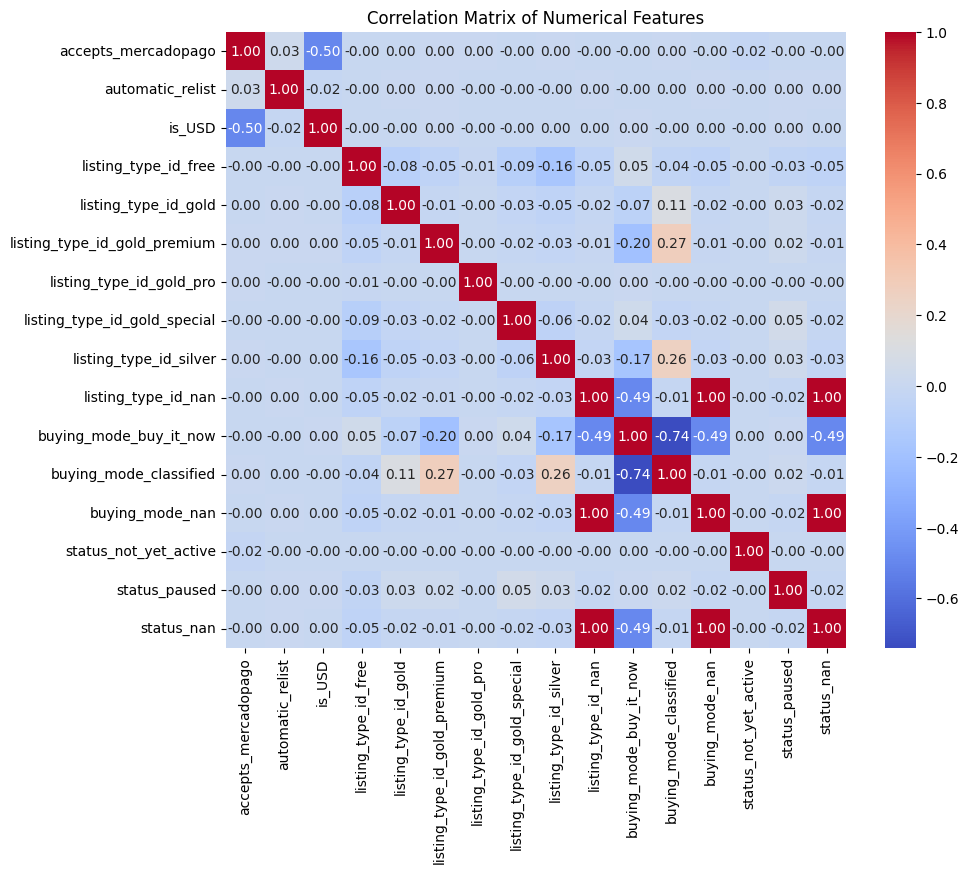

In [52]:
# Compute correlation matrix for numerical features
corr_matrix = df_corr[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [53]:
df_corr[features].isna().sum()

accepts_mercadopago             890
automatic_relist                890
is_USD                            9
listing_type_id_free              9
listing_type_id_gold              9
listing_type_id_gold_premium      9
listing_type_id_gold_pro          9
listing_type_id_gold_special      9
listing_type_id_silver            9
listing_type_id_nan               9
buying_mode_buy_it_now            9
buying_mode_classified            9
buying_mode_nan                   9
status_not_yet_active             9
status_paused                     9
status_nan                        9
dtype: int64

‼️ Some missing values need to be solved

In [54]:
features_train = X_train_transformed_df[features].copy()
target_train = y_train_df.copy()

In [55]:
target_train.info()

<class 'pandas.core.series.Series'>
Index: 89109 entries, 0 to 89999
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
89109 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [56]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89999 entries, 0 to 89911
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accepts_mercadopago           89109 non-null  float64
 1   automatic_relist              89109 non-null  float64
 2   is_USD                        89990 non-null  float64
 3   listing_type_id_free          89990 non-null  float64
 4   listing_type_id_gold          89990 non-null  float64
 5   listing_type_id_gold_premium  89990 non-null  float64
 6   listing_type_id_gold_pro      89990 non-null  float64
 7   listing_type_id_gold_special  89990 non-null  float64
 8   listing_type_id_silver        89990 non-null  float64
 9   listing_type_id_nan           89990 non-null  float64
 10  buying_mode_buy_it_now        89990 non-null  float64
 11  buying_mode_classified        89990 non-null  float64
 12  buying_mode_nan               89990 non-null  float64
 13  status

---
---
## CHECK THIS: Missing values


Se están generando nulls al procesar:
- 0   accepts_mercadopago           89109 non-null  float64
- 1   automatic_relist              89109 non-null  float64

Probable index error

In [57]:
features_train = features_train.dropna(axis=0, how='any') # Remove rows where all features are NaN
target_train = target_train[features_train.index] # Remove target values that do not match the features index

---
---
# Quick training test

## Preprocessing for testing split

### Removing empty values

In [62]:
empty_columns = ['differential_pricing', 'subtitle', 'listing_source', 'coverage_areas','international_delivery_mode']
# Remove empty columns
X_test_df.drop(columns=empty_columns, inplace=True)
y_test_df.drop(columns=empty_columns, inplace=True)

### Missing Values handling

In [63]:
# Convert the column to string type to ensure consistency
X_test_df['sub_status'] = X_test_df['sub_status'].astype(str)
X_test_df['sub_status'] = X_test_df['sub_status'].replace('[]', np.nan)

In [65]:
# Remove items where 'sub_status' contains any data (not active items)
original = len(X_test_df)
mask = X_test_df['sub_status'].isna()
X_test_df = X_test_df[mask]
y_test_df = y_test_df[mask]
cleaned = len(X_test_df)
print(f"Removed {original - cleaned} items ({cleaned/original-1:.2%}) with 'sub_status' data.")

Removed 95 items (-0.95%) with 'sub_status' data.


In [67]:
# 'sub_status' is no longer needed, so we can drop it
X_test_df.drop(columns=['sub_status'], inplace=True)

### Outliers handling

In [68]:
def remove_outliers_iqr(df: pd.DataFrame, column: str, iqr_factor: float = 1.5) -> pd.DataFrame:
    """
    Removes outliers from a specified column in a DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the numerical column to remove outliers from.
        iqr_factor (float): The multiplier for the IQR to define outlier bounds (default is 1.5).

    Returns:
        pd.DataFrame: A new DataFrame with outliers removed from the specified column.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR

    # Filter out the outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"Outliers removed from '{column}' using IQR method (factor: {iqr_factor}):")
    print(f"  Original rows: {len(df)}")
    print(f"  Rows after outlier removal: {len(df_no_outliers)}")
    print(f"  Outliers removed: {len(df) - len(df_no_outliers)}")

    return df_no_outliers

In [69]:
continuous_features = ['price', 'initial_quantity']

# Initialize the DataFrame that will store the cumulatively filtered data.
X_test_outlier_df = X_test_df.copy()

for feature in continuous_features:
    X_test_outlier_df = remove_outliers_iqr(X_test_outlier_df.copy(), feature, iqr_factor=1.5)
    print()

Outliers removed from 'price' using IQR method (factor: 1.5):
  Original rows: 9905
  Rows after outlier removal: 8484
  Outliers removed: 1421

Outliers removed from 'initial_quantity' using IQR method (factor: 1.5):
  Original rows: 8484
  Rows after outlier removal: 7114
  Outliers removed: 1370



### Normalization
Min-max scaling will be applied to continues values.

In [71]:
from sklearn.preprocessing import MinMaxScaler

X_test_scaled_df = X_test_outlier_df.copy().dropna()

# 1. Initialize the scaler
scaler = MinMaxScaler()

# 2. Fit the scaler to your continuous data (learn min and max from training data)
#scaler.fit(X_train_df[continuous_features]) # Use your training data here
# LOAD SCALER PREVIOUSLY FITTED

# 3. Transform the continuous features
X_test_scaled_df[continuous_features] = scaler.transform(X_test_df[continuous_features])

print("DataFrame after Min-Max Scaling:")
X_test_scaled_df[['price','initial_quantity']].describe()

KeyError: "None of [Index(['price', 'initial_quantity'], dtype='object')] are in the [columns]"

### Merge to original dataframe

In [ ]:
# 1. Identify non-continuous features from the original DataFrame
# These are the columns you want to keep as they are from X_test_df
non_continuous_features = [col for col in X_test_df.columns if col not in continuous_features]

# 2. Select these non-continuous features from X_test_df
df_non_continuous = X_test_df[non_continuous_features]

# 3. Rename columns in X_test_scaled_df to add '_scaled' suffix
X_test_scaled_df.drop(columns=non_continuous_features, inplace=True)  # Drop original continuous features
X_test_scaled_df_renamed = X_test_scaled_df.add_suffix('_scaled')

# 4. Concatenate the non-continuous features and the scaled features
X_test_df = pd.concat([df_non_continuous, X_test_scaled_df_renamed], axis=1)

### Binary Encoding

In [74]:
# Create the new boolean feature 'is_USD'
X_test_df['is_USD'] = (X_test_df['currency_id'] == 'USD')

# Store it as numeric (1/0)
X_test_df['is_USD'] = X_test_df['is_USD'].astype('uint8')

In [75]:
X_test_df.drop(columns=['currency_id'], inplace=True)

In [77]:
# Convert booleans into integers
for col in ['accepts_mercadopago', 'automatic_relist']:
    X_test_df[col] = X_test_df[col].dropna().astype('uint8')

### One-hot encoding
**(Categorical features)**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Define the columns to encode
categorical_features = ['listing_type_id', 'buying_mode', 'status']

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first') # drop='first' for multicollinearity

# Fit and transform the selected categorical columns
encoded_data = encoder.fit_transform(X_test_df[categorical_features])

# Get the feature names for the new columns
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Create a DataFrame from the encoded array
ecoded_features = pd.DataFrame(encoded_data, columns=encoded_feature_names)

# Concatenate with the original DataFrame (dropping the original categorical columns)
X_test_transformed_df = pd.concat([X_test_df.drop(columns=categorical_features), ecoded_features], axis=1)

In [ ]:
X_test_transformed_df.sample(5)  # Display a sample of the transformed training data

,seller_address,warranty,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,attributes,tags,parent_item_id,category_id,descriptions,last_updated,...,initial_quantity_scaled,is_USD,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,listing_type_id_nan,buying_mode_buy_it_now,buying_mode_classified,buying_mode_nan,status_not_yet_active,status_paused,status_nan
78908,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],160.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5.213966e+09,[],MLA,[],[dragged_bids_and_visits],MLA1057830753,MLA6315,[{'id': 'MLA6413415474-924376921'}],2015-09-19T03:46:13.000Z,...,0.001400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
85692,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],225.00,"{'local_pick_up': False, 'methods': [], 'tags'...","[{'description': 'Transferencia bancaria', 'id...",7.060837e+09,[{'attribute_combinations': [{'value_id': '920...,MLA,"[{'value_id': 'male', 'attribute_group_id': 'D...",[dragged_bids_and_visits],MLA3089369319,MLA26536,[{'id': 'MLA3838400806-921309197'}],2015-09-18T13:21:51.000Z,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32830,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],50.00,"{'local_pick_up': False, 'methods': [], 'tags'...",[],7.283501e+09,[],MLA,[],[],None,MLA72685,[{'id': 'MLA2563108015-924855245'}],2015-09-19T22:04:46.000Z,...,0.009802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89656,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],199.00,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",3.984101e+09,[],MLA,[],[dragged_bids_and_visits],MLA2673110723,MLA11794,[{'id': 'MLA2133858488-919364695'}],2015-09-13T17:24:39.000Z,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
70042,"{'country': {'name': 'Argentina', 'id': 'AR'},...",Sin garantía,[],399.99,"{'local_pick_up': False, 'methods': [], 'tags'...","[{'description': 'Acordar con el comprador', '...",6.003493e+09,[],MLA,[],[dragged_bids_and_visits],MLA7167560506,MLA374224,[{'id': 'MLA6940160362-922847653'}],2015-09-17T12:31:43.000Z,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Final result

In [ ]:
before_len = len(X_test_df.columns)
after_len = len(X_test_transformed_df.columns)
dif_len = after_len - before_len
print("Number of features:")
print(f" - Before transformations: {before_len}")
print(f" - After transformations: {after_len}")
print(f"Increase of {dif_len} features ({(dif_len/before_len):.2%})")

Number of features:
 - Before transformations: 38
 - After transformations: 48
Increase of 10 features (26.32%)


## Training

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Good practice for many models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification # To create a sample dataset

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42) # random_state for reproducibility

In [59]:
# Train the model using the scaled training data
print("Training the Logistic Regression model...")
model.fit(features_train, target_train)
print("Model training complete.")

Training the Logistic Regression model...
Model training complete.


In [60]:
# Predict on the scaled test data
y_pred = model.predict(X_test)

# Getprediction probabilities (useful for ROC curves, etc.
y_pred_proba = model.predict_proba(X_test_scaled_df) 

/Users/alejandrolloveras/Documents/Programación/MELI/[MeLi] Cod Ex DS/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[{'seller_address': {'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Buenos Aires', 'id': 'AR-B'}, 'city': {'name': 'General Rodríguez', 'id': 'TUxBQ0dFTjY4NTg'}}, 'warranty': None, 'sub_status': [], 'deal_ids': [], 'base_price': 6700.0, 'shipping': {'local_pick_up': True, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'custom', 'dimensions': None}, 'non_mercado_pago_payment_methods': [{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Tarjeta de crédito', 'id': 'MLAOT', 'type': 'N'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 'seller_id': 6469674142, 'variations': [], 'site_id': 'MLA', 'listing_type_id': 'silver', 'price': 6700.0, 'attributes': [], 'buying_mode': 'buy_it_now', 'tags': ['dragged_bids_and_visits'], 'listing_source': '', 'parent_item_id': 'MLA2392767270', 'coverage_areas': [], 'category_id': 'MLA1902', 'descriptions': ["{'id': 'MLA9379759063-915417858'}"], 'last_updated': '2015-09-08T21:17:58.000Z', 'international_delivery_mode': 'none', 'pictures': [{'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/884001-MLA9379759063_032015-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s1-p.mlstatic.com/884001-MLA9379759063_032015-O.jpg', 'quality': '', 'id': '884001-MLA9379759063_032015'}, {'size': '500x464', 'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/310101-MLA9379759063_032015-O.jpg', 'max_size': '1200x1114', 'url': 'http://mla-s2-p.mlstatic.com/310101-MLA9379759063_032015-O.jpg', 'quality': '', 'id': '310101-MLA9379759063_032015'}, {'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/804001-MLA9379759063_032015-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s1-p.mlstatic.com/804001-MLA9379759063_032015-O.jpg', 'quality': '', 'id': '804001-MLA9379759063_032015'}, {'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/846001-MLA9379759063_032015-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s1-p.mlstatic.com/846001-MLA9379759063_032015-O.jpg', 'quality': '', 'id': '846001-MLA9379759063_032015'}, {'size': '381x500', 'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/657001-MLA9379759063_032015-O.jpg', 'max_size': '916x1200', 'url': 'http://mla-s2-p.mlstatic.com/657001-MLA9379759063_032015-O.jpg', 'quality': '', 'id': '657001-MLA9379759063_032015'}, {'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/131001-MLA9379759063_032015-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s2-p.mlstatic.com/131001-MLA9379759063_032015-O.jpg', 'quality': '', 'id': '131001-MLA9379759063_032015'}], 'id': 'MLA9379759063', 'official_store_id': None, 'differential_pricing': None, 'accepts_mercadopago': True, 'original_price': None, 'currency_id': 'ARS', 'thumbnail': 'http://mla-s1-p.mlstatic.com/884001-MLA9379759063_032015-I.jpg', 'title': 'Escritorio Secretter Espectacular', 'automatic_relist': False, 'date_created': '2015-09-08T21:17:57.000Z', 'secure_thumbnail': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/884001-MLA9379759063_032015-I.jpg', 'stop_time': 1446931077000, 'status': 'active', 'video_id': None, 'catalog_product_id': None, 'subtitle': None, 'initial_quantity': 1, 'start_time': 1441747077000, 'permalink': 'http://articulo.mercadolibre.com.ar/MLA9379759063-escritorio-secretter-espectacular-_JM', 'sold_quantity': 0, 'available_quantity': 1}
 {'seller_address': {'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}, 'city': {'name': 'MICROCENTRO', 'id': ''}}, 'warranty': 'Sí', 'sub_status': [], 'deal_ids': [], 'base_price': 119.0, 'shipping': {'local_pick_up': False, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'not_specified', 'dimensions': None}, 'non_mercado_pago_payment_methods': [], 'seller_id': 5921388606, 'variations': [], 'site_id': 'MLA', 'listing_type_id': 'bronze', 'price': 119.0, 'attributes': [], 'buying_mode': 'buy_it_now', 'tags': ['dragged_bids_and_visits'], 'listing_source': '', 'parent_item_id': 'MLA9748425635', 'coverage_areas': [], 'category_id': 'MLA3530', 'descriptions': ["{'id': 'MLA8701321701-906672998'}"], 'last_updated': '2015-08-29T12:55:05.000Z', 'international_delivery_mode': 'none', 'pictures': [{'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/17326-MLA8701321701_072014-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s2-p.mlstatic.com/17326-MLA8701321701_072014-O.jpg', 'quality': '', 'id': '17326-MLA8701321701_072014'}, {'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/17375-MLA8701321701_072014-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s1-p.mlstatic.com/17375-MLA8701321701_072014-O.jpg', 'quality': '', 'id': '17375-MLA8701321701_072014'}, {'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/17343-MLA8701321701_072014-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s1-p.mlstatic.com/17343-MLA8701321701_072014-O.jpg', 'quality': '', 'id': '17343-MLA8701321701_072014'}], 'id': 'MLA8701321701', 'official_store_id': None, 'differential_pricing': None, 'accepts_mercadopago': True, 'original_price': None, 'currency_id': 'ARS', 'thumbnail': 'http://mla-s2-p.mlstatic.com/17326-MLA8701321701_072014-I.jpg', 'title': 'Stassen Espatulas Milenio Numero 3 Codigo 590-3', 'automatic_relist': False, 'date_created': '2015-08-29T12:55:03.000Z', 'secure_thumbnail': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/17326-MLA8701321701_072014-I.jpg', 'stop_time': 1446036902000, 'status': 'active', 'video_id': None, 'catalog_product_id': None, 'subtitle': None, 'initial_quantity': 19, 'start_time': 1440852902000, 'permalink': 'http://articulo.mercadolibre.com.ar/MLA8701321701-stassen-espatulas-milenio-numero-3-codigo-590-3-_JM', 'sold_quantity': 0, 'available_quantity': 19}
 {'seller_address': {'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Buenos Aires', 'id': 'AR-B'}, 'city': {'name': 'Morón', 'id': 'TUxBQ01PUmI1NTBj'}}, 'warranty': 'Sí', 'sub_status': [], 'deal_ids': [], 'base_price': 450.0, 'shipping': {'local_pick_up': False, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'me2', 'dimensions': None}, 'non_mercado_pago_payment_methods': [], 'seller_id': 5675694703, 'variations': [], 'site_id': 'MLA', 'listing_type_id': 'bronze', 'price': 450.0, 'attributes': [], 'buying_mode': 'buy_it_now', 'tags': ['dragged_bids_and_visits'], 'listing_source': '', 'parent_item_id': 'MLA6473720967', 'coverage_areas': [], 'category_id': 'MLA6440', 'descriptions': ["{'id': 'MLA7219741922-927838921'}"], 'last_updated': '2015-09-23T12:41:09.000Z', 'international_delivery_mode': 'none', 'pictures': [{'size': '312x308', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/360601-MLA7219741922_072015-O.jpg', 'max_size': '312x308', 'url': 'http://mla-s1-p.mlstatic.com/360601-MLA7219741922_072015-O.jpg', 'quality': '', 'id': '360601-MLA7219741922_072015'}, {'size': '421x416', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/137501-MLA7219741922_072015-O.jpg', 'max_size': '421x416', 'url': 'http://mla-s1-p.mlstatic.com/137501-MLA7219741922_072015-O.jpg', 'quality': '', 'id': '137501-MLA7219741922_072015'}, {'size': '277x139', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/524601-MLA7219741922_072015-O.jpg', 'max_size': '277x139', 'url': 'http://mla-s1-p.mlstatic.com/524601-MLA7219741922_072015-O.jpg', 'quality': '', 'id': '524601-MLA7219741922_072015'}], 'id': 'MLA7219741922', 'official_store_id': None, 'differential_pricing': None, 'accepts_mercadopago': True, 'original_price': None, 'currency_id': 'ARS', 'thumbnail': 'http://mla-s1-p.mlstatic.com/360601-MLA7219741922_072015-I.jpg', 'title': 'Charm Britania Plata 925 Ovalado!!! Armá La Tuya!!!', 'automatic_relist': False, 'date_created': '2015-09-23T12:41:07.000Z', 'secure_thumbnail': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/360601-MLA7219741922_072015-I.jpg', 'stop_time': 1448196067000, 'status': 'active', 'video_id': None, 'catalog_product_id': None, 'subtitle': None, 'initial_quantity': 2, 'start_time': 1443012067000, 'permalink': 'http://articulo.mercadolibre.com.ar/MLA7219741922-charm-britania-plata-925-ovalado-arma-la-tuya-_JM', 'sold_quantity': 0, 'available_quantity': 2}
 ...
 {'seller_address': {'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Buenos Aires', 'id': 'AR-B'}, 'city': {'name': 'Morón', 'id': 'TUxBQ01PUmI1NTBj'}}, 'warranty': None, 'sub_status': [], 'deal_ids': [], 'base_price': 600.0, 'shipping': {'local_pick_up': False, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'me2', 'dimensions': None}, 'non_mercado_pago_payment_methods': [], 'seller_id': 7300544890, 'variations': [{'attribute_combinations': [{'value_id': '92025', 'name': 'Color Primario', 'value_name': 'Negro', 'id': '83000'}, {'value_id': '101995', 'name': 'Talle', 'value_name': 'M', 'id': '93000'}], 'seller_custom_field': None, 'picture_ids': ['990801-MLA20408435180_092015'], 'sold_quantity': 0, 'available_quantity': 1, 'id': 9473023844, 'price': 600}], 'site_id': 'MLA', 'listing_type_id': 'bronze', 'price': 600.0, 'attributes': [{'value_id': 'male', 'attribute_group_id': 'DFLT', 'name': 'Género', 'value_name': 'Hombre', 'attribute_group_name': 'Otros', 'id': 'GENDER'}, {'value_id': 'Season-Autumn-Winter', 'attribute_group_id': 'FIND', 'name': 'Season', 'value_name': 'Autumn-Winter', 'attribute_group_name': 'Ficha técnica', 'id': 'Season'}], 'buying_mode': 'buy_it_now', 'tags': [], 'listing_source': '', 'parent_item_id': None, 'coverage_areas': [], 'category_id': 'MLA24696', 'descriptions': ["{'id': 'MLA4632330570-913473882'}"], 'last_updated': '2015-09-06T22:29:45.000Z', 'international_delivery_mode': 'none', 'pictures': [{'size': '500x375', 'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/990801-MLA4632330570_092015-O.jpg', 'max_size': '1200x900', 'url': 'http://mla-s2-p.mlstatic.com/990801-MLA4632330570_092015-O.jpg', 'quality': '', 'id': '990801-MLA4632330570_092015'}], 'id': 'MLA4632330570', 'official_store_id': None, 'differential_pricing': None, 'accepts_mercadopago': True, 'original_price': None, 'currency_id': 'ARS', 'thumbnail': 'http://mla-s2-p.mlstatic.com/990801-MLA4632330570_092015-I.jpg', 'title': 'Campera De Cuero Negra', 'automatic_relist': False, 'date_created': '2015-09-06T22:29:30.000Z', 'secure_thumbnail': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/990801-MLA4632330570_092015-I.jpg', 'stop_time': 1446762578000, 'status': 'active', 'video_id': None, 'catalog_product_id': None, 'subtitle': None, 'initial_quantity': 1, 'start_time': 1441578570000, 'permalink': 'http://articulo.mercadolibre.com.ar/MLA4632330570-campera-de-cuero-negra-_JM', 'sold_quantity': 0, 'available_quantity': 1}
 {'seller_address': {'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}, 'city': {'name': 'Balvanera', 'id': 'TUxBQkJBTDMxMDZa'}}, 'warranty': 'Buen estado, se verifica al entregar. la totalidad de nuestro material se encuentra completa y en buen estado. nuestra reputación en mercado libre nos respalda.', 'sub_status': [], 'deal_ids': [], 'base_price': 50.0, 'shipping': {'local_pick_up': True, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'me2', 'dimensions': None}, 'non_mercado_pago_payment_methods': [{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 'seller_id': 6600908485, 'variations': [], 'site_id': 'MLA', 'listing_type_id': 'bronze', 'price': 50.0, 'attributes': [], 'buying_mode': 'buy_it_now', 'tags': ['dragged_bids_and_visits'], 'listing_source': '', 'parent_item_id': 'MLA6491109186', 'coverage_areas': [], 'category_id': 'MLA34202', 'descriptions': ["{'id': 'MLA2763645587-897880642'}"], 'last_updated': '2015-08-18T17:23:33.000Z', 'international_delivery_mode': 'none', 'pictures': [{'size': '387x500', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/20035-MLA2763645587_102014-O.jpg', 'max_size': '931x1200', 'url': 'http://mla-s1-p.mlstatic.com/20035-MLA2763645587_102014-O.jpg', 'quality': '', 'id': '20035-MLA2763645587_102014'}], 'id': 'MLA2763645587', 'official_store_id': None, 'differential_pricing': None, 'accepts_mercadopago': True, 'original_price': None, 'currency_id': 'ARS', 'thumbnail': 'http://mla-s1-p.mlstatic.com/20035-MLA2763645587_102014-I.jpg', 'title': 'Psicodrama Y Teatro Moderno, Jean Fanchette. F2', 'automatic_relist': False, 'date_created': '2015-08-18T17:22:28.000Z', 'secure_thumbnail': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/20035-MLA2763645587_102014-I.jpg', 'stop_time': 1445102548000, 'status': 'active', 'video_id': None, 'catalog_product_id': None, 'subtitle': None, 'initial_quantity': 1, 'start_time': 1439918548000, 'permalink': 'http://articulo.mercadolibre.com.ar/MLA2763645587-psicodrama-y-teatro-moderno-jean-fanchette-f2-_JM', 'sold_quantity': 0, 'available_quantity': 1}
 {'seller_address': {'country': {'name': 'Argentina', 'id': 'AR'}, 'state': {'name': 'Capital Federal', 'id': 'AR-C'}, 'city': {'name': 'San Telmo', 'id': 'TUxBQlNBTjgxMzNa'}}, 'warranty': None, 'sub_status': [], 'deal_ids': [], 'base_price': 75.0, 'shipping': {'local_pick_up': True, 'methods': [], 'tags': [], 'free_shipping': False, 'mode': 'me2', 'dimensions': None}, 'non_mercado_pago_payment_methods': [{'description': 'Transferencia bancaria', 'id': 'MLATB', 'type': 'G'}, {'description': 'Efectivo', 'id': 'MLAMO', 'type': 'G'}], 'seller_id': 8133492021, 'variations': [], 'site_id': 'MLA', 'listing_type_id': 'bronze', 'price': 75.0, 'attributes': [], 'buying_mode': 'buy_it_now', 'tags': ['dragged_bids_and_visits'], 'listing_source': '', 'parent_item_id': 'MLA3503278374', 'coverage_areas': [], 'category_id': 'MLA48855', 'descriptions': ["{'id': 'MLA9372431786-925955158'}"], 'last_updated': '2015-09-21T13:02:18.000Z', 'international_delivery_mode': 'none', 'pictures': [{'size': '375x500', 'secure_url': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/763101-MLA9372431786_032015-O.jpg', 'max_size': '900x1200', 'url': 'http://mla-s1-p.mlstatic.com/763101-MLA9372431786_032015-O.jpg', 'quality': '', 'id': '763101-MLA9372431786_032015'}, {'size': '375x500', 'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/732101-MLA9372431786_032015-O.jpg', 'max_size': '900x1200', 'url': 'http://mla-s2-p.mlstatic.com/732101-MLA9372431786_032015-O.jpg', 'quality': '', 'id': '732101-MLA9372431786_032015'}, {'size': '375x500', 'secure_url': 'https://a248.e.akamai.net/mla-s2-p.mlstatic.com/895101-MLA9372431786_032015-O.jpg', 'max_size': '900x1200', 'url': 'http://mla-s2-p.mlstatic.com/895101-MLA9372431786_032015-O.jpg', 'quality': '', 'id': '895101-MLA9372431786_032015'}], 'id': 'MLA9372431786', 'official_store_id': None, 'differential_pricing': None, 'accepts_mercadopago': True, 'original_price': None, 'currency_id': 'ARS', 'thumbnail': 'http://mla-s1-p.mlstatic.com/763101-MLA9372431786_032015-I.jpg', 'title': 'Libro Religioso Practicas Piadosas Nuestra Sra. De Fatima', 'automatic_relist': False, 'date_created': '2015-09-21T13:02:16.000Z', 'secure_thumbnail': 'https://a248.e.akamai.net/mla-s1-p.mlstatic.com/763101-MLA9372431786_032015-I.jpg', 'stop_time': 1448024536000, 'status': 'active', 'video_id': None, 'catalog_product_id': None, 'subtitle': None, 'initial_quantity': 1, 'start_time': 1442840536000, 'permalink': 'http://articulo.mercadolibre.com.ar/MLA9372431786-libro-religioso-practicas-piadosas-nuestra-sra-de-fatima-_JM', 'sold_quantity': 0, 'available_quantity': 1}].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Evaluate Performance

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report (provides Precision, Recall, F1-Score for each class)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)